In [1]:
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
import sys
import os


scripts_dir = os.path.abspath('../scripts')
if scripts_dir not in sys.path:
    sys.path.append(scripts_dir)

# Importar el archivo viztools.py
import viztools as v

# Al leer el archivo CSV que se matengan las modificaciones en los dtypes de dates
df = pd.read_csv("../data/superstore_clean.csv", parse_dates=['Order Date', 'Ship Date'])

In [41]:
# cargar cuando modifique las funciones o incluya nuevas
importlib.reload(v)

<module 'viztools' from '/Users/jaimeinchaurraga/Documents/GitHub/03_EDA_Superstore_23/scripts/viztools.py'>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Category                9994 non-null   object        
 1   City                    9994 non-null   object        
 2   Customer Name           9994 non-null   object        
 3   Order Date              9994 non-null   datetime64[ns]
 4   Order Profitable?       9994 non-null   object        
 5   Product Name            9994 non-null   object        
 6   Region                  9994 non-null   object        
 7   Segment                 9994 non-null   object        
 8   Ship Date               9994 non-null   datetime64[ns]
 9   Ship Mode               9994 non-null   object        
 10  Ship Status             9994 non-null   object        
 11  State                   9994 non-null   object        
 12  Sub-Category            9994 non-null   object  

In [4]:
# Agrupar las variables categóricas y númericas para poder trabajar mejor 
categorical_columns = [
    'Category', 'City', 'Customer Name',
    'Order Profitable?', 'Product Name', 'Region', 'Segment',
    'Ship Mode', 'Ship Status', 'State', 'Sub-Category'
]

numerical_columns = [
    'Days to Ship Actual', 'Days to Ship Scheduled', 'Discount', 'Profit',
    'Quantity', 'Sales', 'Sales Forecast'
]
# Creo una nueva variable para agrupar las variables con datetime 
date_columns = [
    'Order Date','Ship Date'
]

# Análisis Multivariante de Variables Categóricas

En esta sección se va a realizar un análsis gráfico entre variables categóricas. Primero se realizará una comprativa visual bivariante entre las combinaciones más interesantes desde el punto de vista de negocio  
que pueda servir como un primer punto de partida. En caso de encontrar alguna relación interesante, se continuará el análisis mediante tests matemáticos apropiados o incluso ampliado el análsis visual,  
haciendo uso de otras gráficas o incluyendo más variables categóricas.

### 1. **Relación entre Order 'Profitable' y Categóricas**  

**¿Existe alguna causa aparente que provoque que un pedido no sea rentable, relacionada con alguna variable categórica?**


A continuación se realiza un análisis comparativo entre `Order_Profitable?` y el resto de las variables categóricas. El objetivo es tratar de analizar posibles causas que provoquen que un pedido no sea rentable

In [ ]:
#v.pinta_distribucion_categoricas(df,["Category","Order Profitable?"],relativa= True , mostrar_valores= True)

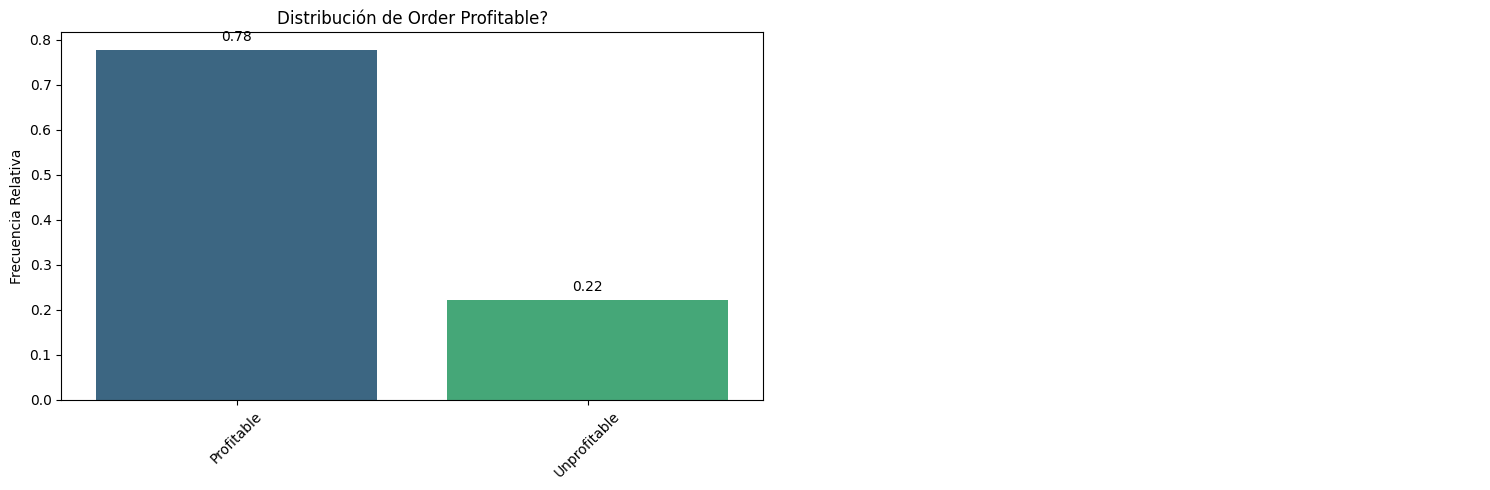

In [4]:
v.pinta_distribucion_categoricas(df, ['Order Profitable?'], relativa=True, mostrar_valores=True)

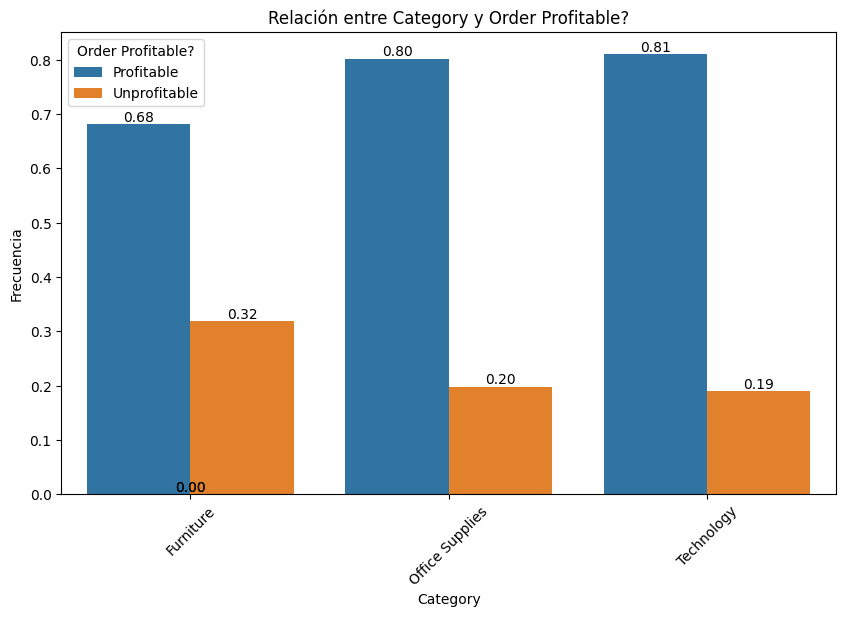

In [5]:
v.plot_categorical_relationship_fin(df,"Category","Order Profitable?",relative_freq = True, show_values= True)

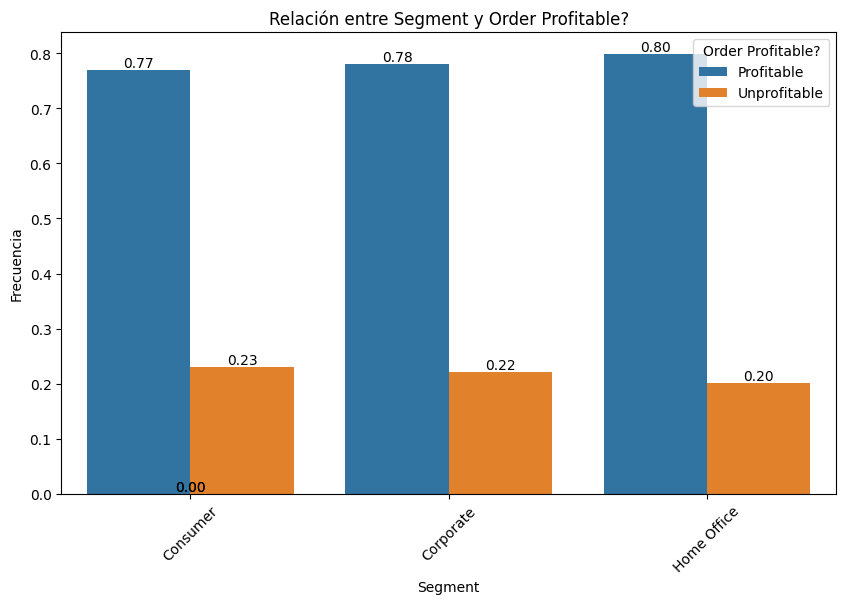

In [6]:
v.plot_categorical_relationship_fin(df,"Segment","Order Profitable?",relative_freq = True, show_values= True)

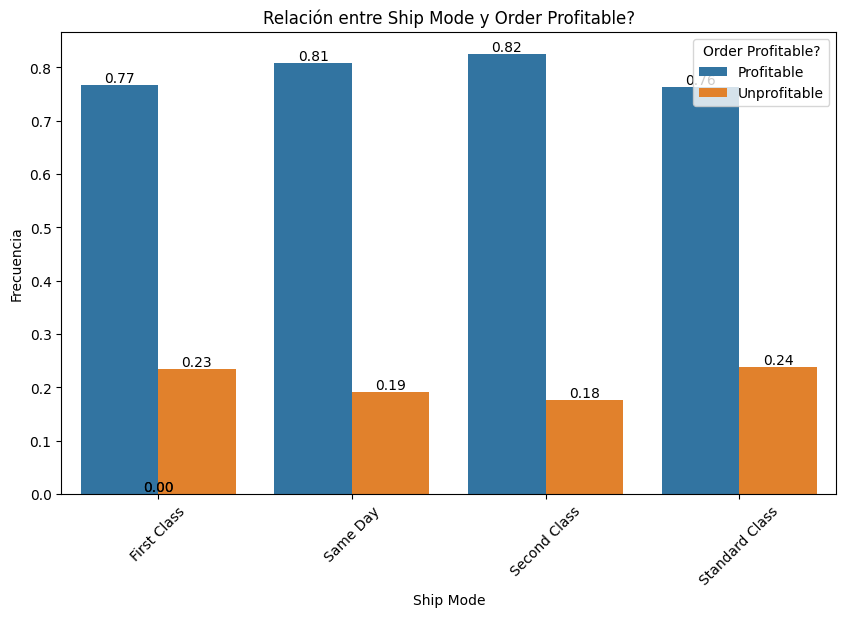

In [7]:
v.plot_categorical_relationship_fin(df,"Ship Mode","Order Profitable?",relative_freq = True, show_values= True)

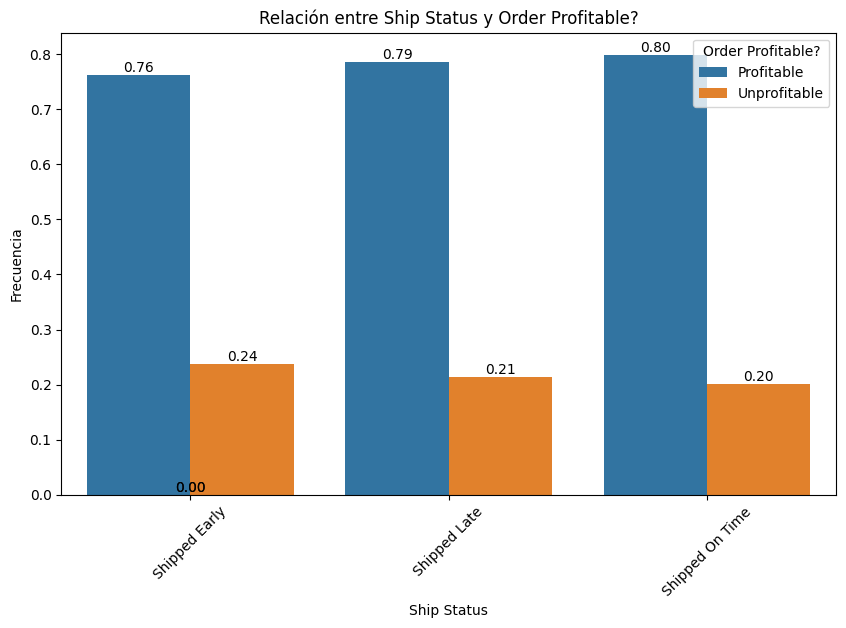

In [8]:
v.plot_categorical_relationship_fin(df,"Ship Status","Order Profitable?",relative_freq = True, show_values= True)

Como se puede observar en las gráficas de columnas, la proporción entre los pedidos que son y no son rentables en las principales variables categóricas se mantiene prácticamente igual, por lo que se descarta que guarden relación alguna

### 2. **Relación entre 'Segment' vs 'Ship Mode'**  

**¿Existen diferencias en la preferencia por modos de envío entre diferentes segmentos de clientes?**

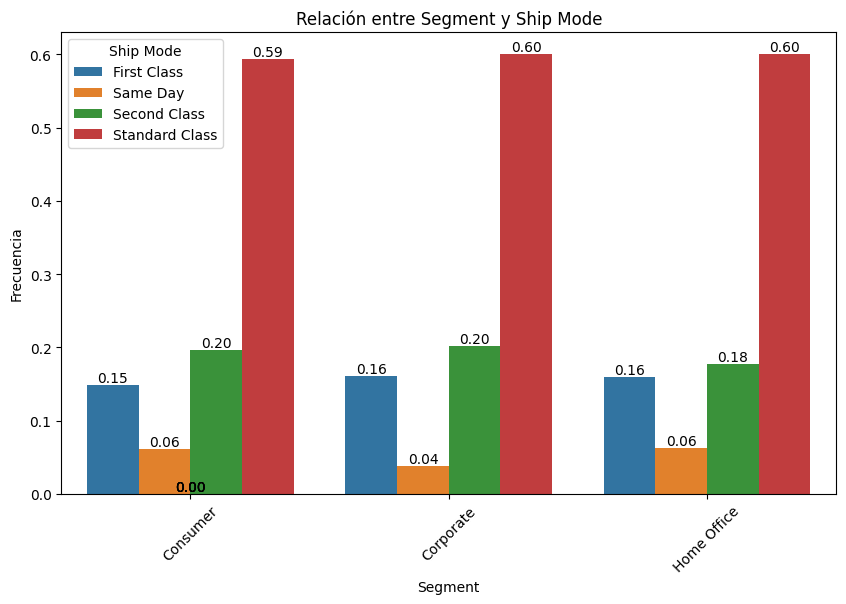

In [9]:
v.plot_categorical_relationship_fin(df,"Segment","Ship Mode",relative_freq = True, show_values= True)

Tras observar la gráfica se puede apreciar que la proporción de los diferentes modos de envío se mantiene bastante constante entre los distintos segmentos.  

- `Standard Class`: Es el modo de envío dominante en todos los segmentos, con aproximadamente el 60% en cada uno de ellos.  
- `Second Class`: También se mantiene consistente en torno al 20% en los tres segmentos.  
- `First Class` y `Same Day`: Tienen una proporción menor, y tampoco muestran diferencias significativas entre los segmentos.  

Esta uniformidad sugiere que el segmento de clientes no influye significativamente en la elección del modo de envío. Independientemente de si los clientes son consumidores, corporaciones, o trabajan desde casa, tienden a seleccionar los modos de envío en proporciones similares.

### 3. **Relación entre 'Category' vs 'Ship Mode'**  

**¿Existen diferencias en los envíos dependiendo de la categoría del producto?**

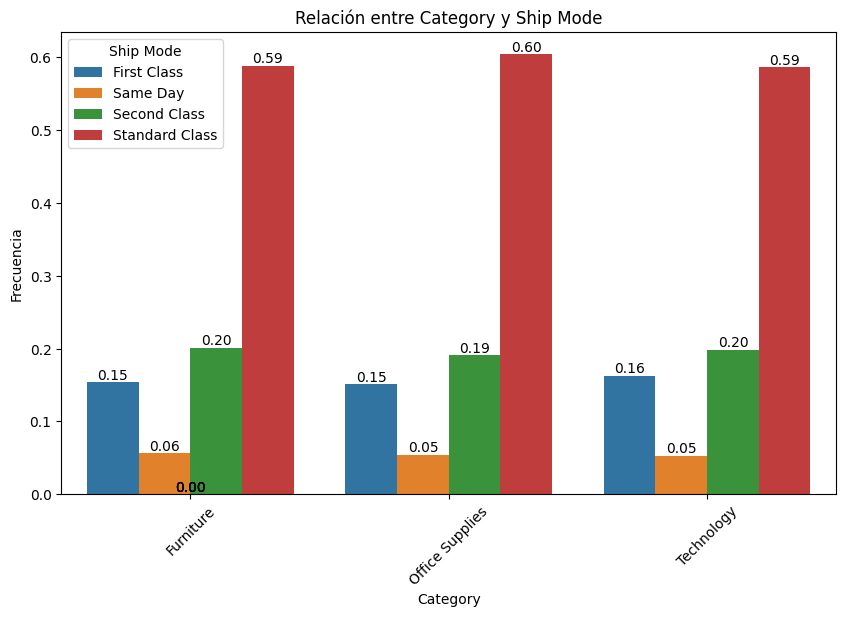

In [12]:
v.plot_categorical_relationship_fin(df,"Category","Ship Mode",relative_freq = True, show_values= True)

Al ver la gráfica se puede observar que la estrctura es muy similar a la anteriormente vista de `Segment` vs `Ship Mode`, por lo tanto se descarta que exista alguna evidencia clara que muestre una relación entre ambas variables

### 4. **Relación entre 'Segment' vs 'Category'**  

**¿Qué categorías de productos son más populares en cada segmento?**

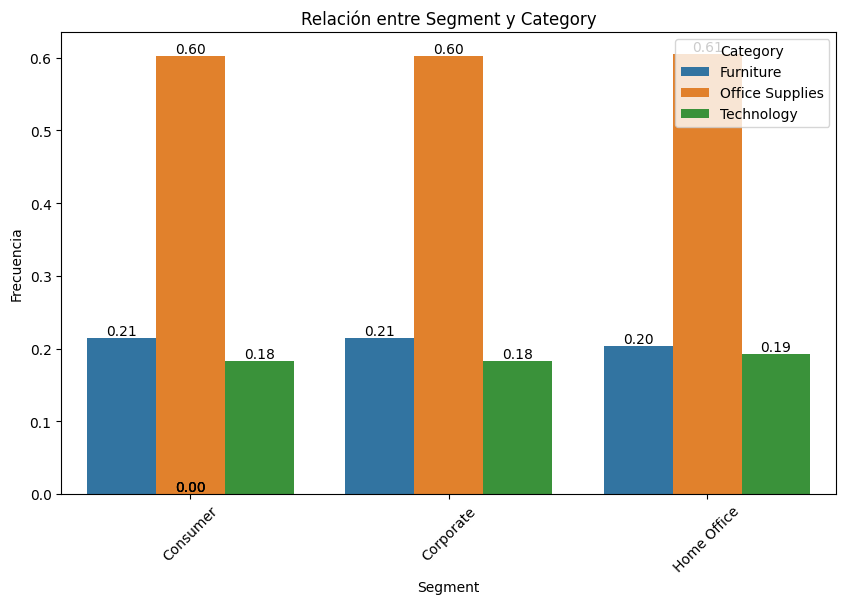

In [11]:
v.plot_categorical_relationship_fin(df,"Segment","Category",relative_freq = True, show_values= True)

Se continua con la misma dinámica anterior: las clases dentro de las variables se mantienen muy regulares sin indicar algún pico que pueda llamar la atención.  
Los diferentes segmentos de cliente obtienen proporciones muy similares de productos según su categoría.  

### 5. **Relación entre Ship Mode vs. Ship Status'**  

**¿El modo de envío seleccionado tiene un impacto en la puntualidad del envío?**

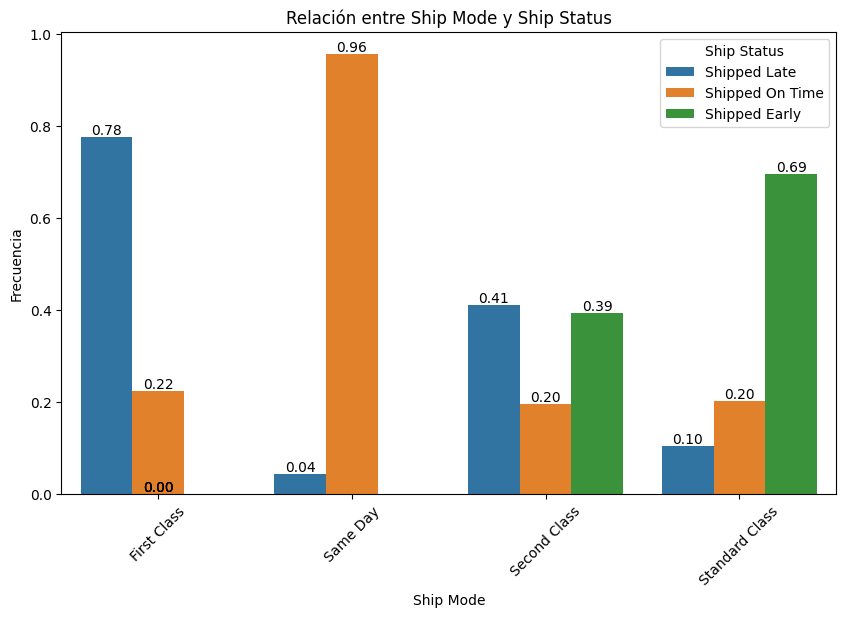

In [17]:
v.plot_categorical_relationship_fin(df,"Ship Mode","Ship Status",relative_freq = True, show_values= True)

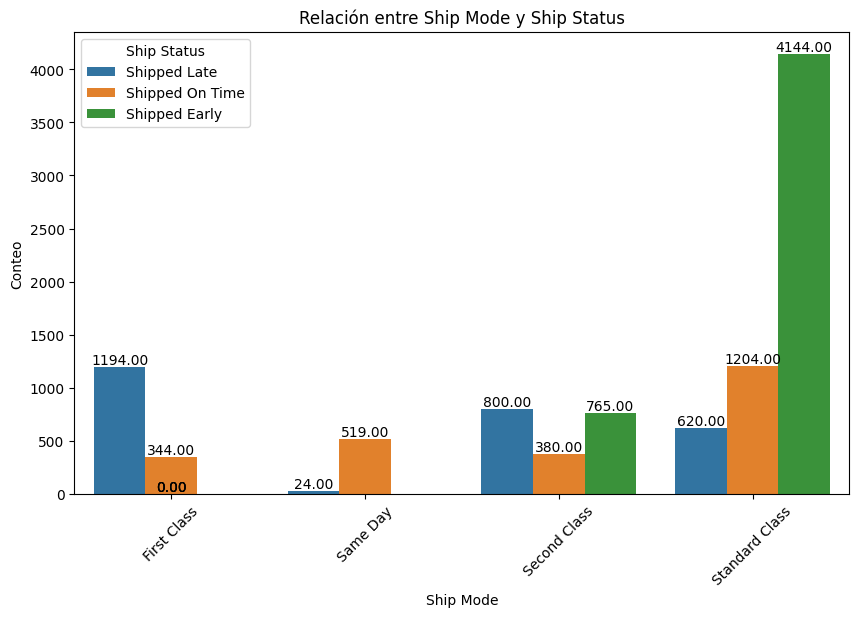

In [23]:
# dado que hay información relavante, parece interesante ver tanto la información abosulta como relativa (en porcentaje)
v.plot_categorical_relationship_fin(df,"Ship Mode","Ship Status",relative_freq = False, show_values= True)

In [21]:
# Doble check para confirmar los resultados de la gráfica
# Agrupar por Ship Status y aplicar value_counts sobre Ship Mode, normalizado para obtener porcentajes
percentages = df.groupby('Ship Mode')['Ship Status'].value_counts(normalize=True)

# Convertir a un DataFrame para tener una vista más clara
percentages = percentages.rename('percentage').reset_index()

# Mostrar el resultado
print(percentages)


        Ship Mode      Ship Status  percentage
0     First Class     Shipped Late    0.776333
1     First Class  Shipped On Time    0.223667
2        Same Day  Shipped On Time    0.955801
3        Same Day     Shipped Late    0.044199
4    Second Class     Shipped Late    0.411311
5    Second Class    Shipped Early    0.393316
6    Second Class  Shipped On Time    0.195373
7  Standard Class    Shipped Early    0.694370
8  Standard Class  Shipped On Time    0.201743
9  Standard Class     Shipped Late    0.103887


Por primera vez, se obtiene una gráfica con datos que pueden ser muy relevantes para mejorar la productividad y eficiencia de la compañía:  

- `Same day`: La opción menos solicitada a la hora de realizar un envío. La eficiencia es extremadamente alta, ya que más del 95% de los pedidos son entregados en la fecha estipulada.  
Es entendible que no haya pedidos en la categoría 'Shipped Early' dado que no puede tardar menos de un día.      
- `First Class`: Sin duda, se trata de la categoría que más llama la atención: La ineficiencia es bastante elevada, ya que casi el 80% de los pedidos son entregados fuera de plazo.  
Como es lógico, es de las opciones menos solicitadas, seguramente por su precio. Sería prioritario entender a fondo la causa; resulta inaceptable desde el punto de vista de un cliente.  
Hay que recordar que aproximadamente un 15% del total de cada segmento de clientes ('Corporate', 'Consumer, 'Home Office') realizan envíos eligiendo esta opción. Se debe tener un contacto urgente  
con negocio y logística para revertir esta situación cuanto antes.  
- `Second Class`: Se trata de un caso curioso. Por un lado, sigue habiendo una gran cantidad de porcentaje de envíos que no cumplen con la fecha de llegada acordada (40% aprox.).  
En contraste, otro 40% de los envíos son entregados antes del límite establecido, seguido de un 20% que llega a tiempo. Tal vez tendría sentido realizar un esfuerzo por reducir el número de pedidos   
que llegan tarde, a costa de reducir aquellos envíos que llegan antes de tiempo. Claro que probablemente haya razones más complejas en la logística en las cuales se tenga que profundizar.  
- `Standard Class`: La opción más solicitada con mucha diferencia. Vuele a llamar la atención que el 70% de los pedidos se entregen antes de tiempo. Al menos en esta categoría el porcentaje de envíos  
con retrasos es mucho más reducido (10% aprox) aunque igualmente debería ser una prioridad a mejorar (Aunque sea un porcentaje más bajo el número de pedidos es muy elevado teniendo en cuenta que es la opción con más pedidos en términos absolutos)  

Conclusión:  
La prioridad principal sería entender las causas principales de los pedidos que tienen retrasos, especialmente en las opciones más premium donde en términos relativos son bastante comunes.  
No tiene sentido que cuando los clientes eligan las opciones con precios más elevados (seguramente lo hagan por urgencias), las probabilidades de que sus pedidos no lleguen a tiempo sean tan altas.  
Mejor no tener envíos tardíos y tempranos a tener muchos envíos tardíos y muchos tempranos :) 



### 5. **Relación entre State vs. Order Profitable'**  

**¿Existe algún tipo de patrón referente a si los pedidos son rentables en los diferentes estados?**

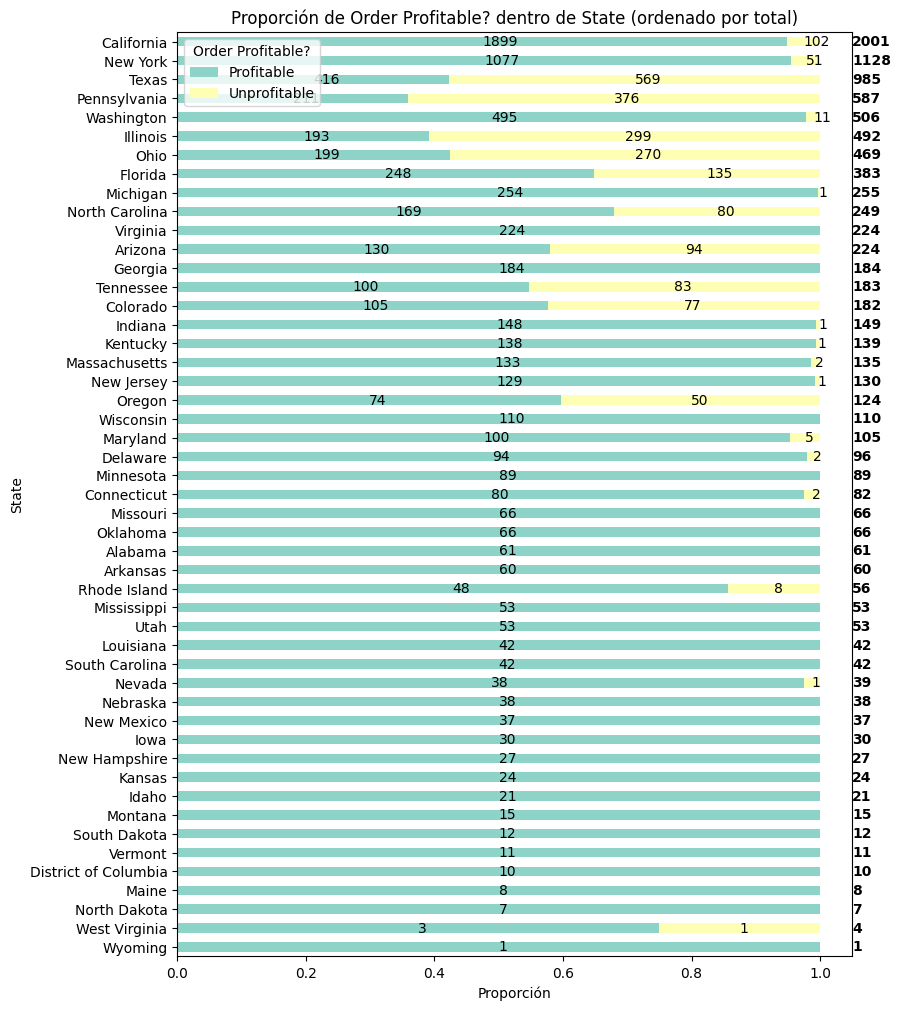

In [42]:
v.plot_categorical_composition(df, 'State', 'Order Profitable?')


In [ ]:
# doble check de que los datos de la función son correctos
#df['State'].value_counts()

In [ ]:
# doble check de que los datos de la función son correctos (II)
#sts_pr = df.groupby('State')['Order Profitable?'].value_counts(normalize=False)

# Convertir a un DataFrame para tener una vista más clara
#sts_pr = sts_pr.rename('percentage').reset_index()

# Mostrar el resultado
#print(sts_pr)

En la gráfica aparecen los diferentes estados con su distribución de pedidos y la proporción de los que sí y no han sido rentables.  
- En términos generales aproximadamente un 77% total de pedidos han sido rentables frente a aproximadamente un 22% que no lo han sido.  
- La mayor parte de los pedidos no rentables se encuentran en las ciudades con más pedidos. Destaca el hecho de que en varias de estas ciudades la proporción negativa es incluso mayor.  
De acuerdo con la gráfica, los cinco estados con más pedidos (California, Nueva York, Texas, Pensilvania y Washington) presentan un alto número de pedidos no rentables:  
    - California: Aunque tiene el mayor número de pedidos (2001), tiene también un 5.1% de pedidos no rentables (102 de 2001).  
    - Texas: Un caso notable es Texas, donde el 57.8% de los pedidos no son rentables (569 de 985).  
    - Pensilvania: Presenta un 64% de pedidos no rentables, uno de los porcentajes más altos (376 de 587).  
- Parece que según bajan el número de pedidos totales, también lo hacen los pedidos no rentables; de hecho desde mitad de tabla hacia abajo es anómalo encontrar datos negativos.  
Esto podría significar que en mercados más pequeños los costos operativos son menores, o que las compañías priorizan la eficiencia logística en estos estados para asegurar que los pedidos sean rentables  
- Resulta importante hacer un estudio más específico de las ciudades con más pedidos para tratar de encontrar alguna razón que pueda indicar la proporción tan alta de pedidos no rentables en ciudades con gran demanda.


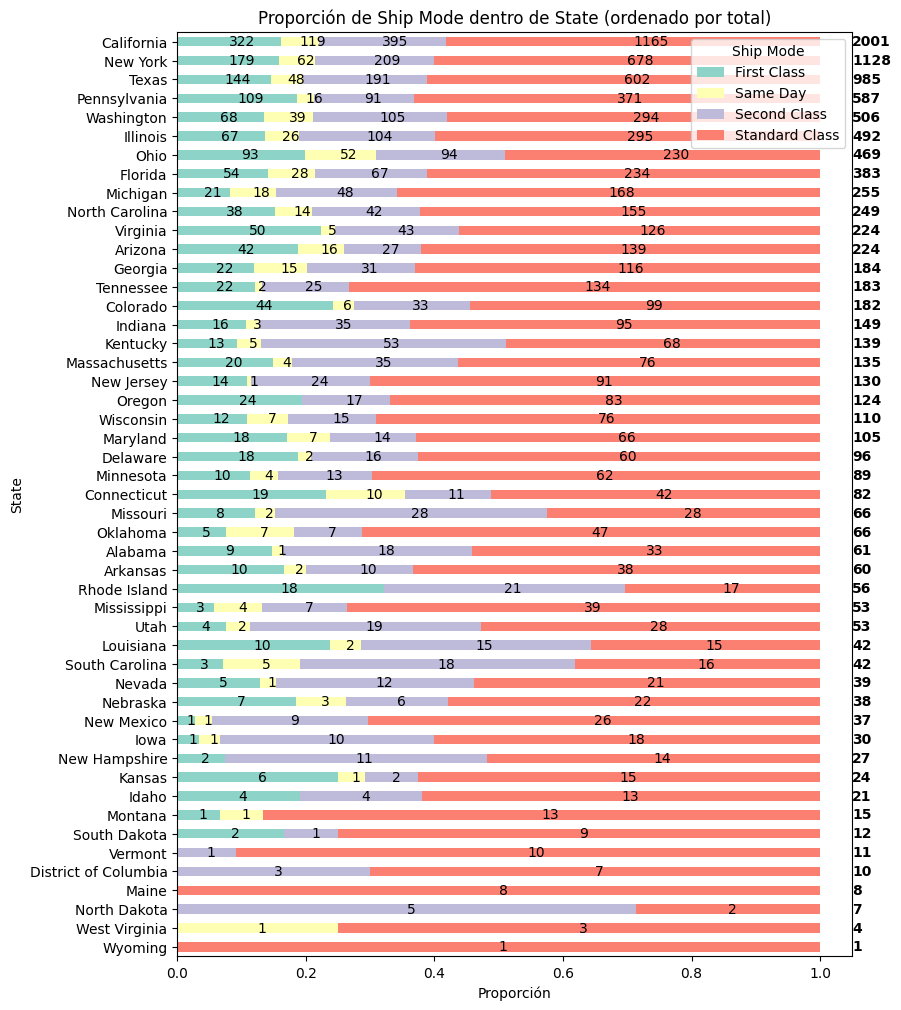

In [43]:
v.plot_categorical_composition(df, 'State', 'Ship Mode')